In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

In [43]:
data = pd.read_csv('../data/spam.csv', encoding="ISO-8859-1")
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)
data.drop_duplicates(inplace=True)

data['v1'].replace(['ham', 'spam'], [0, 1], inplace=True)

data.set_axis(['Category', 'Message'], axis=1, inplace=True)

data

/var/folders/15/hdxx982s3fj3bxc5v64cbpd00000gn/T/ipykernel_6904/1066889766.py:7: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data.set_axis(['Category', 'Message'], axis=1, inplace=True)


,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [44]:
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(data['Message'])
y = data['Category']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [47]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 95.29%
Precision: 98.04
Recall: 68.18
F1-score: 80.43

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1331
           1       0.98      0.68      0.80       220

    accuracy                           0.95      1551
   macro avg       0.97      0.84      0.89      1551
weighted avg       0.95      0.95      0.95      1551



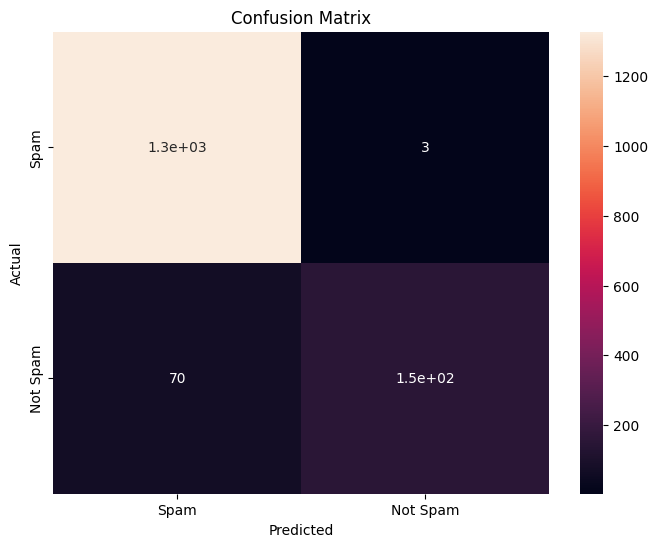

In [48]:
plt.figure(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=['Spam', 'Not Spam'], yticklabels=['Spam', 'Not Spam'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()